In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load data
energy_df = pd.read_csv('../Data/energy_dataset.csv', parse_dates=['time'])

print(f"Energy: {energy_df.shape}")


Energy: (35064, 29)


In [2]:
# Columns
print("ENERGY COLUMNS:")
print(energy_df.columns.tolist())
print("\n-------------------\n")


ENERGY COLUMNS:
['time', 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast solar day ahead', 'forecast wind offshore eday ahead', 'forecast wind onshore day ahead', 'total load forecast', 'total load actual', 'price day ahead', 'price actual']

-------------------



In [5]:
# Data Cleaning (same as data_exploration notebook)

# Drop useless columns 
energy_df = energy_df.drop(columns=[
    'generation hydro pumped storage aggregated',
    'forecast wind offshore eday ahead'
])

# Drop rows with missing demand values
energy_df = energy_df.dropna(subset=['total load actual'])

print(f"After cleaning: {energy_df.shape}")

KeyError: "['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'] not found in axis"

In [6]:
#we will first looking into the load curve for winters and summers

#1. extracting time 
energy_df['time'] = pd.to_datetime(energy_df['time'], utc= True)
energy_df['hour'] = energy_df['time'].dt.hour

# Step 3: Extract month (1-12) from each timestamp  
energy_df['month'] = energy_df['time'].dt.month
# Define seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Other'

energy_df['season'] = energy_df['month'].apply(get_season)

# Check counts
print(energy_df['season'].value_counts())


season
Other     17554
Summer     8829
Winter     8645
Name: count, dtype: int64


In [7]:
# Grouping by season and hour, calculating mean demand
seasonal_hourly = energy_df.groupby(['season', 'hour'])['total load actual'].mean().unstack(level=0).round(2)

print(seasonal_hourly.head())

season     Other    Summer    Winter
hour                                
0       23395.08  24225.94  24801.12
1       22711.07  23622.11  23555.72
2       22415.26  23343.35  22968.14
3       22556.14  23520.65  22761.72
4       23736.45  24778.01  23123.44


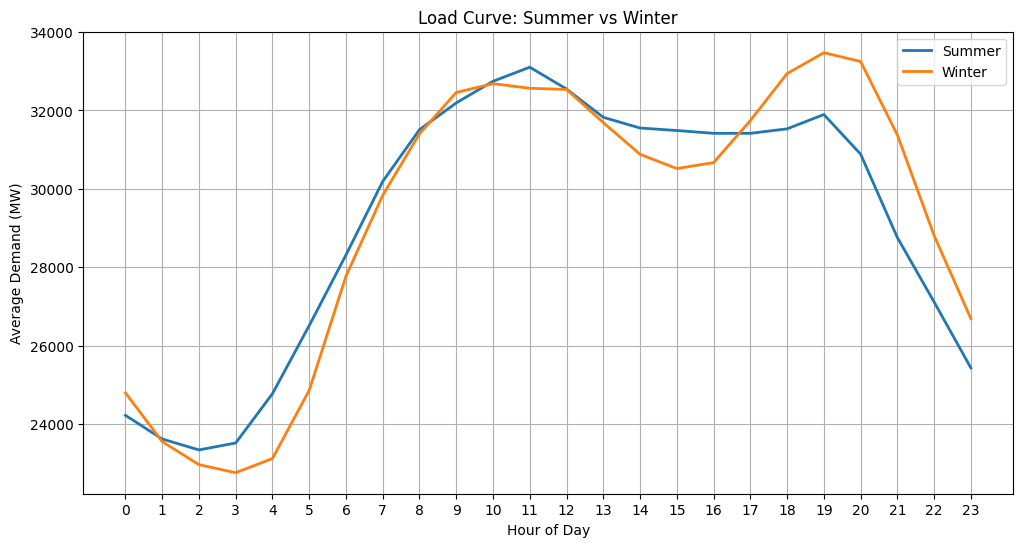

In [8]:
from cProfile import label


plt.figure(figsize=(12, 6))
plt.plot(seasonal_hourly.index, seasonal_hourly['Summer'], label='Summer', linewidth=2)
plt.plot(seasonal_hourly.index, seasonal_hourly['Winter'], label='Winter', linewidth=2)
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand (MW)')
plt.title('Load Curve: Summer vs Winter')
plt.legend()
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()